In [2]:
import numpy as np
loaded_true_gradients = np.load('DP_begin_true_gradients.npy', allow_pickle=True)

In [3]:
norm_all=[]
angle_all=[]

for i in range(50):
    print('i=',i)
    true_grad=loaded_true_gradients[i]
    loaded_per_sample_gradients = np.load(f'DP_begin_{i}_gradients.npy', allow_pickle=True)
    for j in range(20):
        per_sample_grad=loaded_per_sample_gradients[j]
        norm=np.linalg.norm(true_grad-per_sample_grad)
        angle=np.arccos(np.dot(true_grad,per_sample_grad) / (np.linalg.norm(true_grad)*np.linalg.norm(per_sample_grad)))
        norm_all.append(norm)
        angle_all.append(angle)



i= 0
i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9
i= 10
i= 11
i= 12
i= 13
i= 14
i= 15
i= 16
i= 17
i= 18
i= 19
i= 20
i= 21
i= 22
i= 23
i= 24
i= 25
i= 26
i= 27
i= 28
i= 29
i= 30
i= 31
i= 32
i= 33
i= 34
i= 35
i= 36
i= 37
i= 38
i= 39
i= 40
i= 41
i= 42
i= 43
i= 44
i= 45
i= 46
i= 47
i= 48
i= 49


In [4]:
norm_all=np.array(norm_all)
angle_all=np.array(angle_all)

print(norm_all.size)

1000


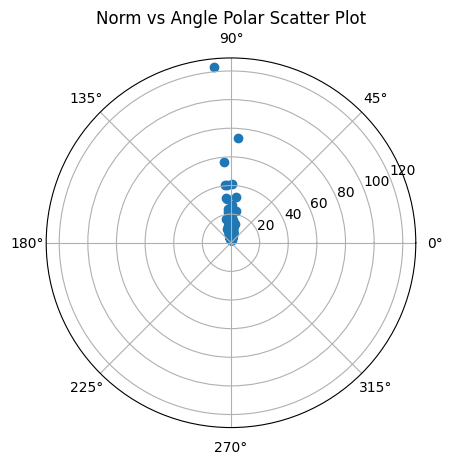

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.scatter(angle_all, norm_all)

# 添加标题
ax.set_title('Norm vs Angle Polar Scatter Plot')

# 显示图像
plt.show()

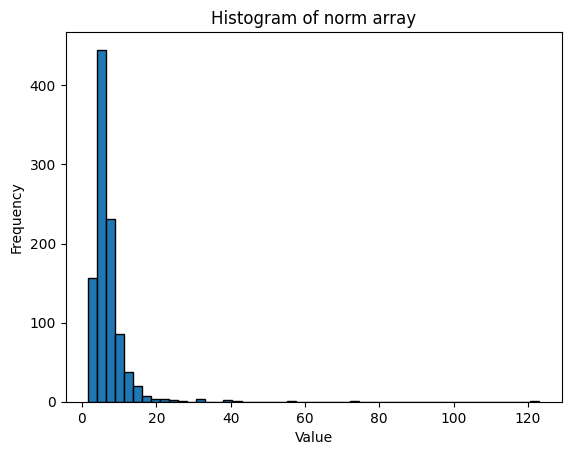

In [6]:
# 绘制直方图
plt.hist(norm_all, bins=50, edgecolor='black')

# 添加标题和标签
plt.title('Histogram of norm array')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 假设 gradient 是一个包含许多 numpy 数组的列表，并且这些数组的维度是相同的
gradient=[]

for i in range(50):
    print('i=',i)
    #true_grad=loaded_true_gradients[i]
    loaded_per_sample_gradients = np.load(f'DP_begin_{i}_gradients.npy', allow_pickle=True)
    for j in range(20):
        per_sample_grad=loaded_per_sample_gradients[j]
        norm=np.linalg.norm(true_grad-per_sample_grad)
        angle=np.arccos(np.dot(true_grad,per_sample_grad) / (np.linalg.norm(true_grad)*np.linalg.norm(per_sample_grad)))
        norm_all.append(norm)
        angle_all.append(angle)


NameError: name 'gradient' is not defined

In [ ]:
# 将列表转换为一个二维的 numpy 数组
gradient_matrix = np.vstack(gradient)

# 使用 PCA 将数据降维到 2D
pca = PCA(n_components=2)
gradient_pca = pca.fit_transform(gradient_matrix)

# 获取投影矩阵
projection_matrix = pca.components_

# 绘制结果
plt.scatter(gradient_pca[:, 0], gradient_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gradients')
plt.show()